Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
airbnb<-read.csv('airbnbueno.csv',sep = ';', stringsAsFactors = T)
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)
nrow(airbnb)
head(airbnb , 5)


[1] 14780

ID,Listing.Url,Scrape.ID,Last.Scraped,Name,Summary,Space,Description,Experiences.Offered,Neighborhood.Overview,...,Review.Scores.Communication,Review.Scores.Location,Review.Scores.Value,License,Jurisdiction.Names,Cancellation.Policy,Calculated.host.listings.count,Reviews.per.Month,Geolocation,Features
14712301,https://www.airbnb.com/rooms/14712301,2.017030e+13,2017-03-04,Cozy Studio between Earls Court and Gloucester Rd,"Located 1 minute away from Earls Court. It is a commercial street full of restaurants, supermarkets, the tube station, gym, hotels and everything you might need. It is a cozy studio, in a perfect location and good price even if it is located in one of the most expensive areas of London (Kensington and Chelsea Borough). It has a double bed a big desk an induction kitchen and a shower. There are cupboards to store all your needs.",,"Located 1 minute away from Earls Court. It is a commercial street full of restaurants, supermarkets, the tube station, gym, hotels and everything you might need. It is a cozy studio, in a perfect location and good price even if it is located in one of the most expensive areas of London (Kensington and Chelsea Borough). It has a double bed a big desk an induction kitchen and a shower. There are cupboards to store all your needs.",none,,...,9,9,10,,,strict,1,0.34,"51.492474020220754,-0.18862840099442768","Host Has Profile Pic,Host Identity Verified"
12884849,https://www.airbnb.com/rooms/12884849,2.017030e+13,2017-03-05,Five bedroom house in Barnes,"Lovely and spacious Edwardian house located on beautiful street in Barnes, between the village (10 minutes walk) and Hammersmith station (15 minutes walk / 5 minutes by bus). Can accommodate up to 8 adults and 2 young children.","The house is spacious with approx 225 sq. of living space. The ground floor has a TV / living room, where the sofa can be used as a single bed if required. There is also a separate dining / reception area adjacent to the kitchen, as well as a conservatory with a smaller dining table and plenty of toys (which will be removed if you come without kids!). Both the kitchen and the conservatory have direct access on to the garden. On the first floor, the master bedroom is located, as well as two smaller bedrooms and a spacious bathroom. The childrens' bedrooms have a crib and a cot bed respectively, however we can prepare one of them with a king size sofa bed if requested, to accommodate older children or additional adults. On the top floor, there are two additional and spacious bedrooms as well as shared bathroom. All bedrooms including the children's bedrooms have plenty of wardrobe space. House is basic but clean and fully functional.","Lovely and spacious Edwardian house located on beautiful street in Barnes, between the village (10 minutes walk) and Hammersmith station (15 minutes walk / 5 minutes by bus). Can accommodate up to 8 adults and 2 young children. The house is spacious with approx 225 sq. of living space. The ground floor has a TV / living room, where the sofa can be used as a single bed if required. There is also a separate dining / reception area adjacent to the kitchen, as well as a conservatory with a smaller dining table and plenty of toys (which will be removed if you come without kids!). Both the kitchen and the conservatory have direct access on to the garden. On the first floor, the master bedroom is located, as well as two smaller bedrooms and a spacious bathroom. The childrens' bedrooms have a crib and a cot bed respectively, however we can prepare one of them with a king size sofa bed if requested, to accommodate older children or additional adults. On the top floor, there are two additional",none,Quiet residential street,...,10,10,9,,,moderate,2,0.76,"51.482004616612734,-0.23927746504041247","Host Has Profile Pic,Is Location Exact"
17524980,https://www.airbnb.com/rooms/17524980,2.017030e+13,2017-03-05,"Modern & Bright, Central Soho, 1 Bedroom Apartment","A nice compact one bedroom apartment th

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [3]:
just <- as.vector(c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')) # Storing the columns I want to extract as a vecto                                     
result <- airbnb[,just]     
ncol(result)
nrow(result)
head(result, 5)

[1] 14

[1] 14780

City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
London,Entire home/apt,,1,1.0,1,1,50,NA,1,20,90,51.49247,-0.1886284
London,Entire home/apt,LB of Richmond upon Thames,8,2.5,5,5,175,NA,6,25,87,51.48200,-0.2392775
London,Entire home/apt,,2,1.0,1,1,155,NA,1,0,NA,51.51579,-0.1363321
Madrid,Private room,Palacio,2,1.0,1,1,36,NA,1,0,98,40.41011,-3.7147540
Madrid,Entire home/apt,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.7094389


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [4]:
library(dplyr)

#Realizamos un subconjunto del dataframe anterior
subset(result,Room.Type=='Entire home/apt') -> df_entire
subset(df_entire,City == 'Madrid') -> df_madrid
df_madrid <- df_madrid %>% filter(Neighbourhood !='')


In [5]:
head(df_madrid, 5)

City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
Madrid,Entire home/apt,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
Madrid,Entire home/apt,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
Madrid,Entire home/apt,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
Madrid,Entire home/apt,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
Madrid,Entire home/apt,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322


In [6]:
#A continuación quitamos las columnas que ya no necesitamos porque al estar filtrado son valores idénticos en cada entrada
borrar <- c("Room.Type","City")
df_madrid <- df_madrid[ , !(names(df_madrid) %in% borrar)]
nrow(df_madrid)
head(df_madrid, 5)


[1] 5601

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [7]:
df_madrid$Square.Meters<-df_madrid$Square.Feet*0.092903
head(df_madrid, 5)

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439,NA
Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249,NA
Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843,NA
La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691,NA
Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [8]:

print("El número de apartamentos con NA en Square.Meters es :")
sum(is.na(df_madrid$Square.Meters))


[1] "El número de apartamentos con NA en Square.Meters es :"


[1] 5254

In [9]:
print("La proporción de pisos sin valor de Metros Cuadrados es: " )
(sum(is.na(df_madrid$Square.Meters)) / length(df_madrid$Square.Meters)*100)

[1] "La proporción de pisos sin valor de Metros Cuadrados es: "


[1] 93.80468

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [10]:
library(dplyr)
# Filtrar el dataframe para quedarnos solo con los apartamentos que tienen un valor de metros cuadrados diferente de NA
df_filt1 <- df_madrid %>% filter(!is.na(Square.Meters))
nrow(df_filt1)
# Contar el número de apartamentos con 0 metros cuadrados
num_apartamentos_0_metros <- sum(df_filt1$Square.Meters == 0)
num_apartamentos_0_metros
# Calcular el porcentaje de apartamentos con 0 metros cuadrados
porcentaje <- num_apartamentos_0_metros / nrow(df_filt1)
porcentaje
head(df_filt1 , 5)

[1] 347

[1] 128

[1] 0.3688761

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
Embajadores,3,1,1,2,75,0,2,9,83,40.41267,-3.704507,0.00000
Sol,5,1,2,5,100,753,2,5,91,40.41609,-3.706012,69.95596
Legazpi,2,1,1,1,32,0,1,0,94,40.38994,-3.693091,0.00000
Cuatro Caminos,9,2,3,8,100,1184,4,10,90,40.45241,-3.699048,109.99715
Cuatro Caminos,4,2,1,1,46,603,2,7,93,40.45021,-3.699102,56.02051


Reemplazar todos los 0m^2 por NA 

In [11]:
df_madrid$Square.Meters[df_madrid$Square.Meters =='0']<-NA
table(!is.na(df_madrid$Square.Meters))



FALSE  TRUE 
 5382   219 

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Warning message:
“Removed 5382 rows containing non-finite values (stat_density).”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”Warning

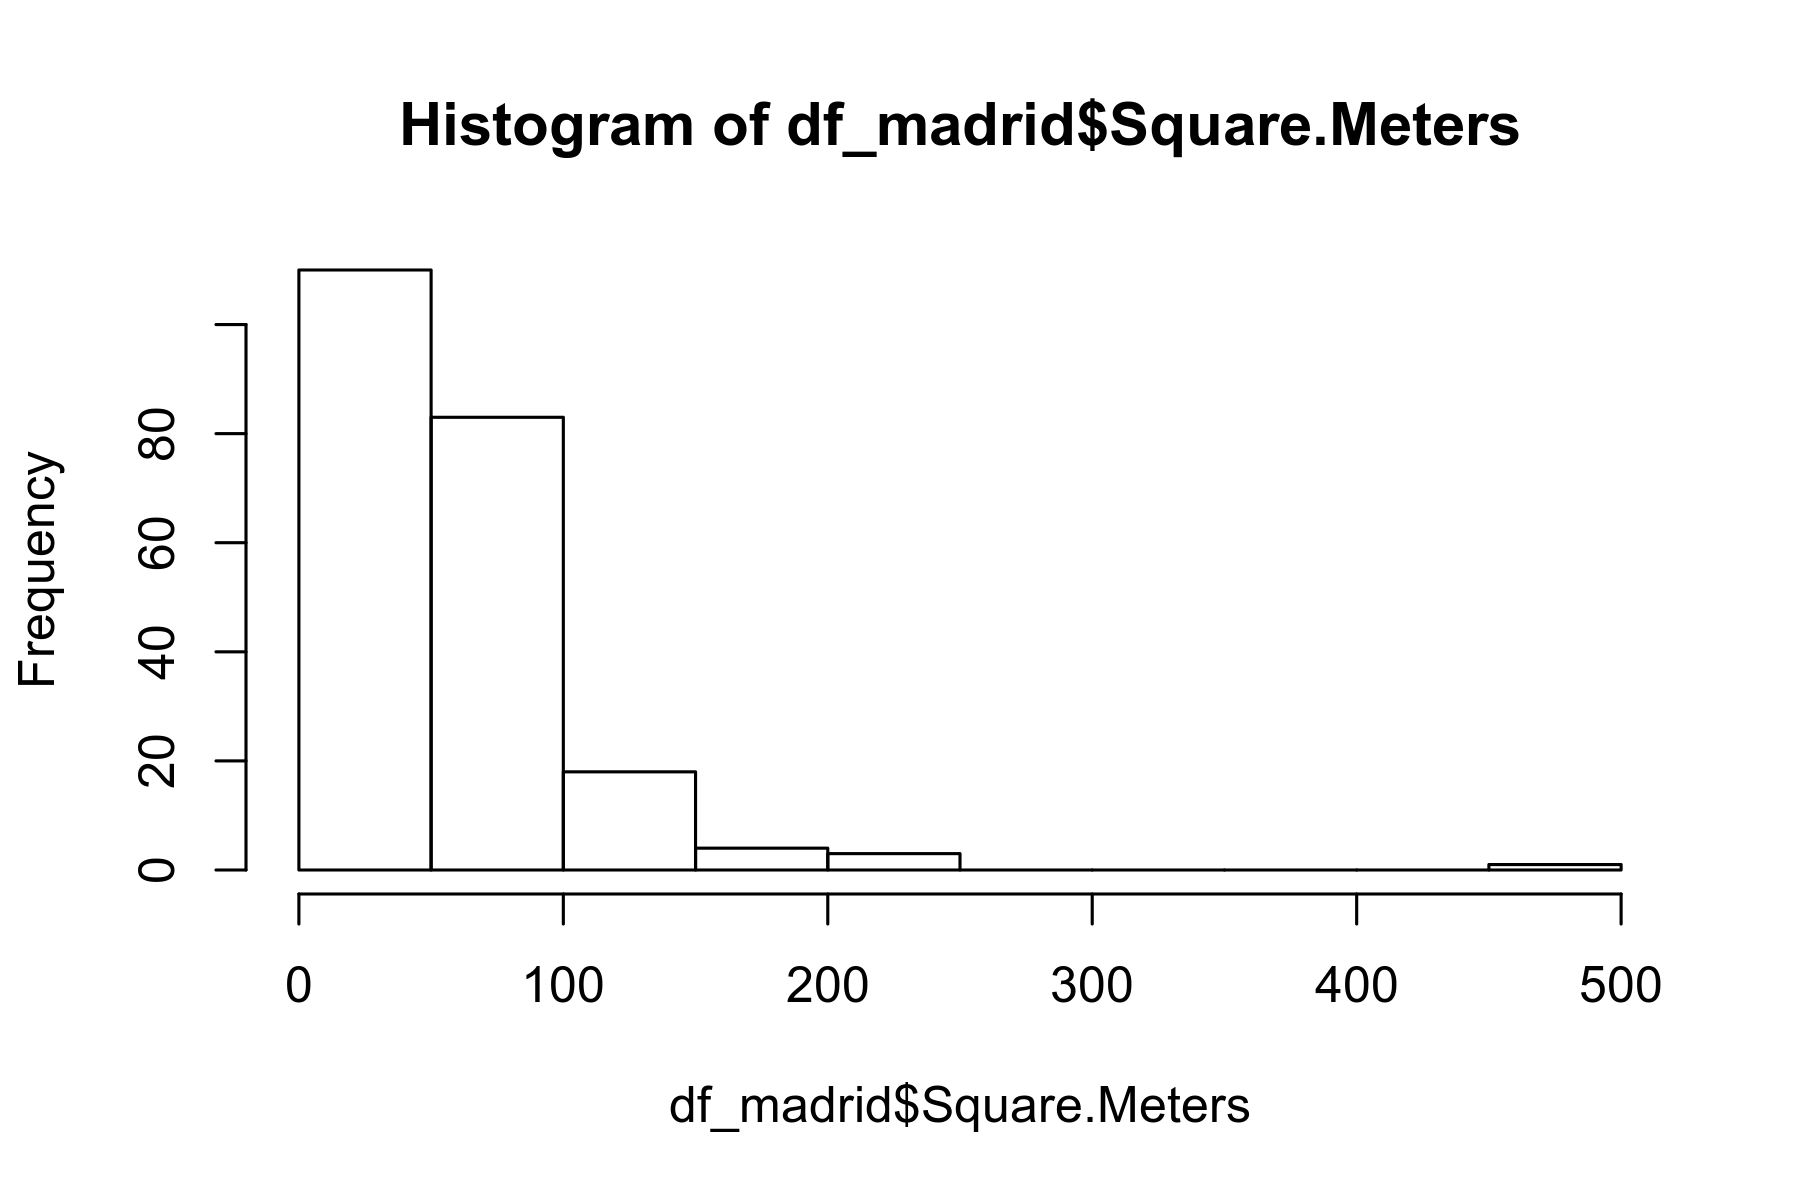

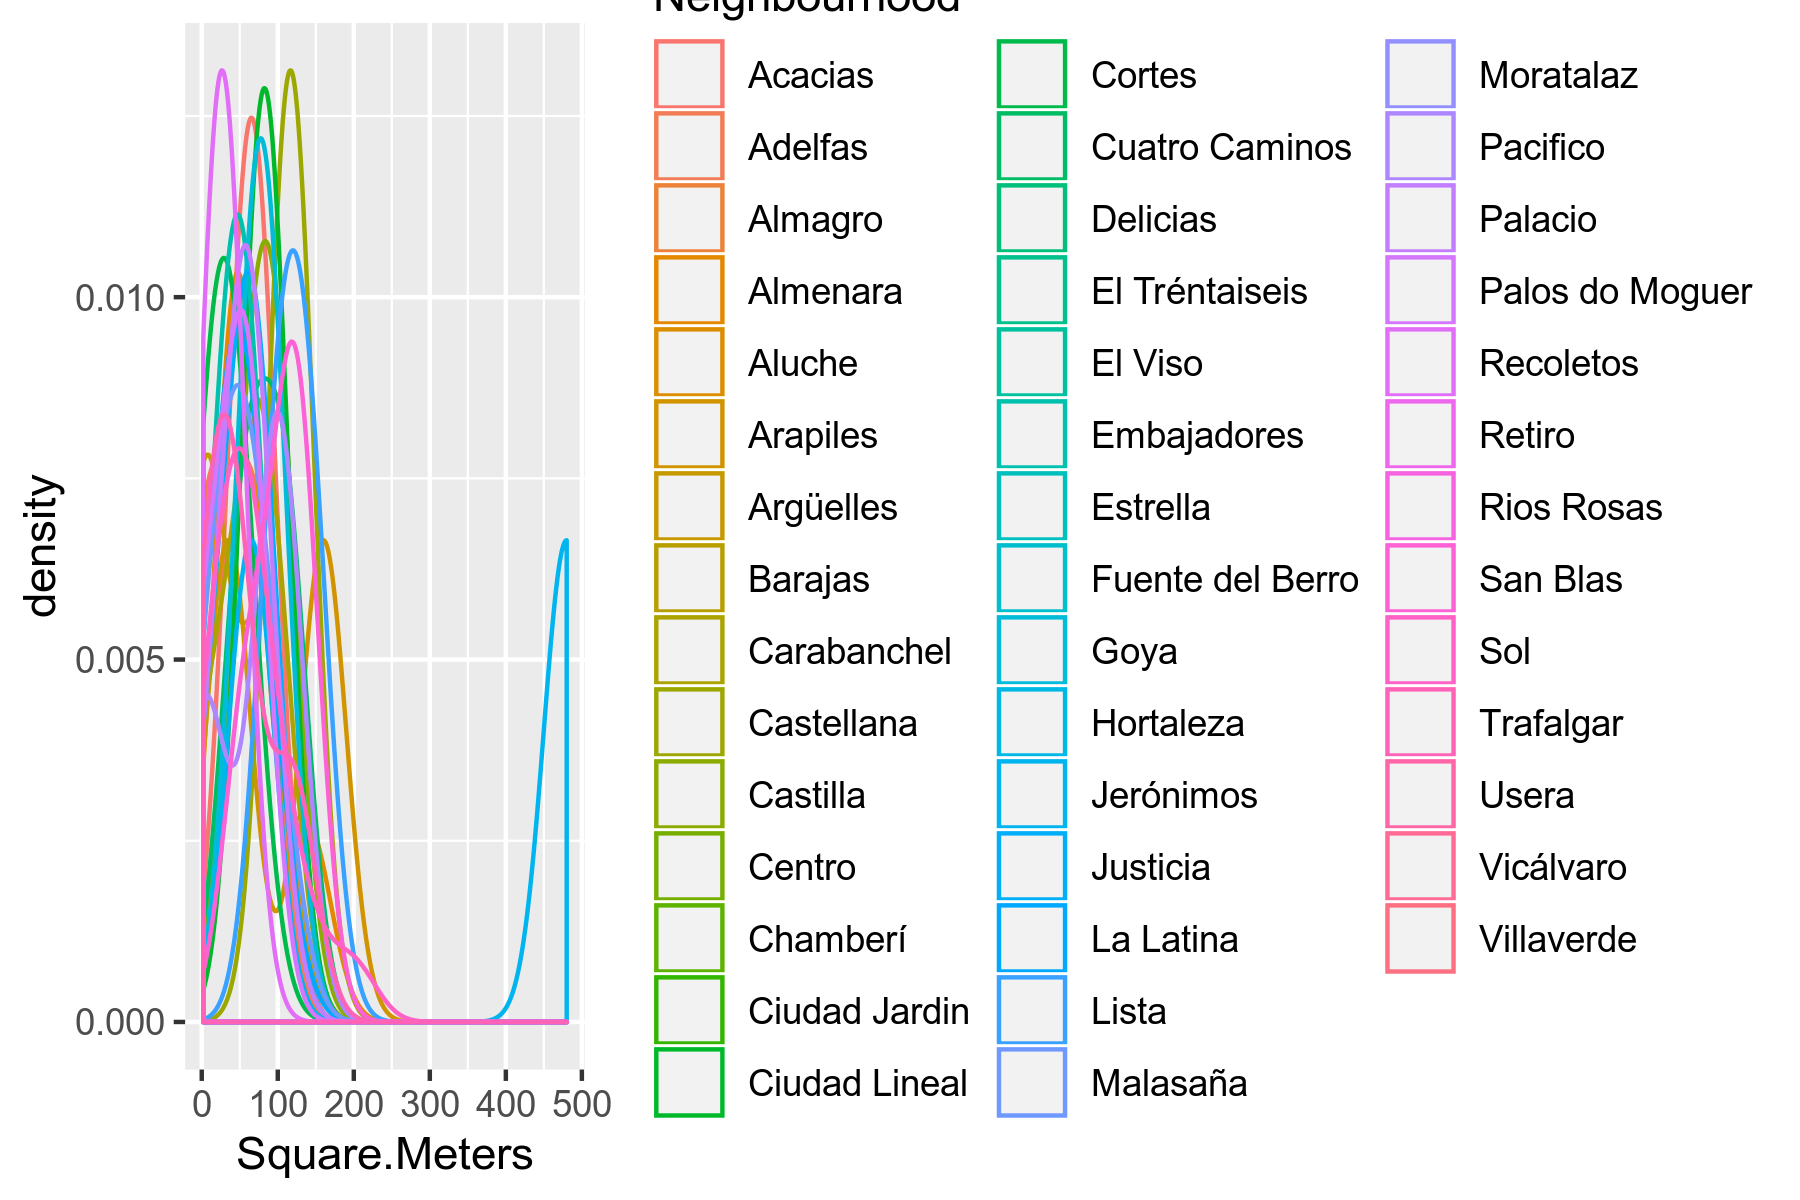

In [12]:
hist(df_madrid$Square.Meters  )
ggplot(df_madrid,aes(x=Square.Meters,color=Neighbourhood))+geom_density(bw=30)

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [13]:

df_madrid <- df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters < 20, NA , Square.Meters))
sum(is.na(df_madrid$Square.Meters))
table(!is.na(df_madrid$Square.Meters))


[1] 5427


FALSE  TRUE 
 5427   174 

In [14]:
#Del total inicial de 5601 entradas de Madrid con datos nos quedamos con los 184 resultados que tienen valor para Metros Cuadrados distinto de NA

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [15]:
datos <- subset(df_madrid, !is.na(Square.Meters), select = c(Neighbourhood, Square.Meters ))
unique(datos$Neighbourhood )

[1] Sol              Cuatro Caminos   Pacifico         Carabanchel     
 [5] La Latina        Malasaña         Justicia         Palacio         
 [9] Castellana       Castilla         Embajadores      Trafalgar       
[13] Barajas          Acacias          Recoletos        Argüelles       
[17] El Tréntaiseis   Cortes           Rios Rosas       Almenara        
[21] Lista            Centro           Ciudad Lineal    Ciudad Jardin   
[25] Almagro          Goya             Adelfas          Usera           
[29] Arapiles         El Viso          Retiro           Fuente del Berro
[33] San Blas         Chamberí         Palos do Moguer  Jerónimos       
[37] Vicálvaro        Moratalaz       
391 Levels:  Acacias Acton Adams Morgan Adelfas Agios Nikolaos ... Zilker

In [16]:

#Número total de barrios en el dataframe df_madrid
length(unique(datos$Neighbourhood))
table(!is.na(datos$Square.Meters))
# Filtrar el dataframe para quedarte solo con los barrios que tengo con valores no todos NA
subset(datos,Neighbourhood=='Malasaña' |Neighbourhood=='Sol' |Neighbourhood=='La Latina' |Neighbourhood=='Embajadores' |Neighbourhood=='Cortes' |Neighbourhood=='Justicia' |Neighbourhood=='Argüelles' |Neighbourhood=='Palacio' |Neighbourhood=='Almenara' |Neighbourhood=='Carabanchel' |Neighbourhood=='Acacias' |Neighbourhood=='Trafalgar' |Neighbourhood=='Adelfas' |Neighbourhood=='Castilla' |Neighbourhood=='Ciudad Lineal' |Neighbourhood=='Goya' |Neighbourhood=='Jerónimos' |Neighbourhood=='Pacifico' |Neighbourhood=='Palos do Moguer' |Neighbourhood=='Recoletos' |Neighbourhood=='Almagro'|Neighbourhood=='Aluche' |Neighbourhood=='Arapiles' |Neighbourhood=='Barajas' |Neighbourhood=='Centro' |Neighbourhood=='Chamberí' |Neighbourhood=='Ciudad Jardin' |Neighbourhood=='Cuatro Caminos' |Neighbourhood=='El Viso' |Neighbourhood=='Lista' |Neighbourhood=='Retiro' |Neighbourhood=='Rios Rosas' |Neighbourhood=='San Blas' |Neighbourhood=='Usera' |Neighbourhood=='Vicálvaro' |Neighbourhood=='Villaverde' ) -> df_madrid_final
head(df_madrid_final , 10)



[1] 38


TRUE 
 174 

,Neighbourhood,Square.Meters
106,Sol,69.95596
147,Cuatro Caminos,109.99715
148,Cuatro Caminos,56.02051
170,Pacifico,109.99715
226,Carabanchel,99.96363
258,La Latina,65.03210
293,Malasaña,49.98181
296,Malasaña,65.03210
309,La Latina,37.99733
354,Sol,24.99091


In [17]:
subset_with_na <- subset(df_madrid_final, is.na(Square.Meters))
barrios_with_na <- unique(subset_with_na$Barrio)
clean_madrid <- subset(datos, !Neighbourhood %in% barrios_with_na)
nrow(clean_madrid)
unique(clean_madrid$Neighbourhood)
head(clean_madrid , 20)


[1] 174

[1] Sol              Cuatro Caminos   Pacifico         Carabanchel     
 [5] La Latina        Malasaña         Justicia         Palacio         
 [9] Castellana       Castilla         Embajadores      Trafalgar       
[13] Barajas          Acacias          Recoletos        Argüelles       
[17] El Tréntaiseis   Cortes           Rios Rosas       Almenara        
[21] Lista            Centro           Ciudad Lineal    Ciudad Jardin   
[25] Almagro          Goya             Adelfas          Usera           
[29] Arapiles         El Viso          Retiro           Fuente del Berro
[33] San Blas         Chamberí         Palos do Moguer  Jerónimos       
[37] Vicálvaro        Moratalaz       
391 Levels:  Acacias Acton Adams Morgan Adelfas Agios Nikolaos ... Zilker

,Neighbourhood,Square.Meters
106,Sol,69.95596
147,Cuatro Caminos,109.99715
148,Cuatro Caminos,56.02051
170,Pacifico,109.99715
226,Carabanchel,99.96363
258,La Latina,65.03210
293,Malasaña,49.98181
296,Malasaña,65.03210
309,La Latina,37.99733
354,Sol,24.99091


El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



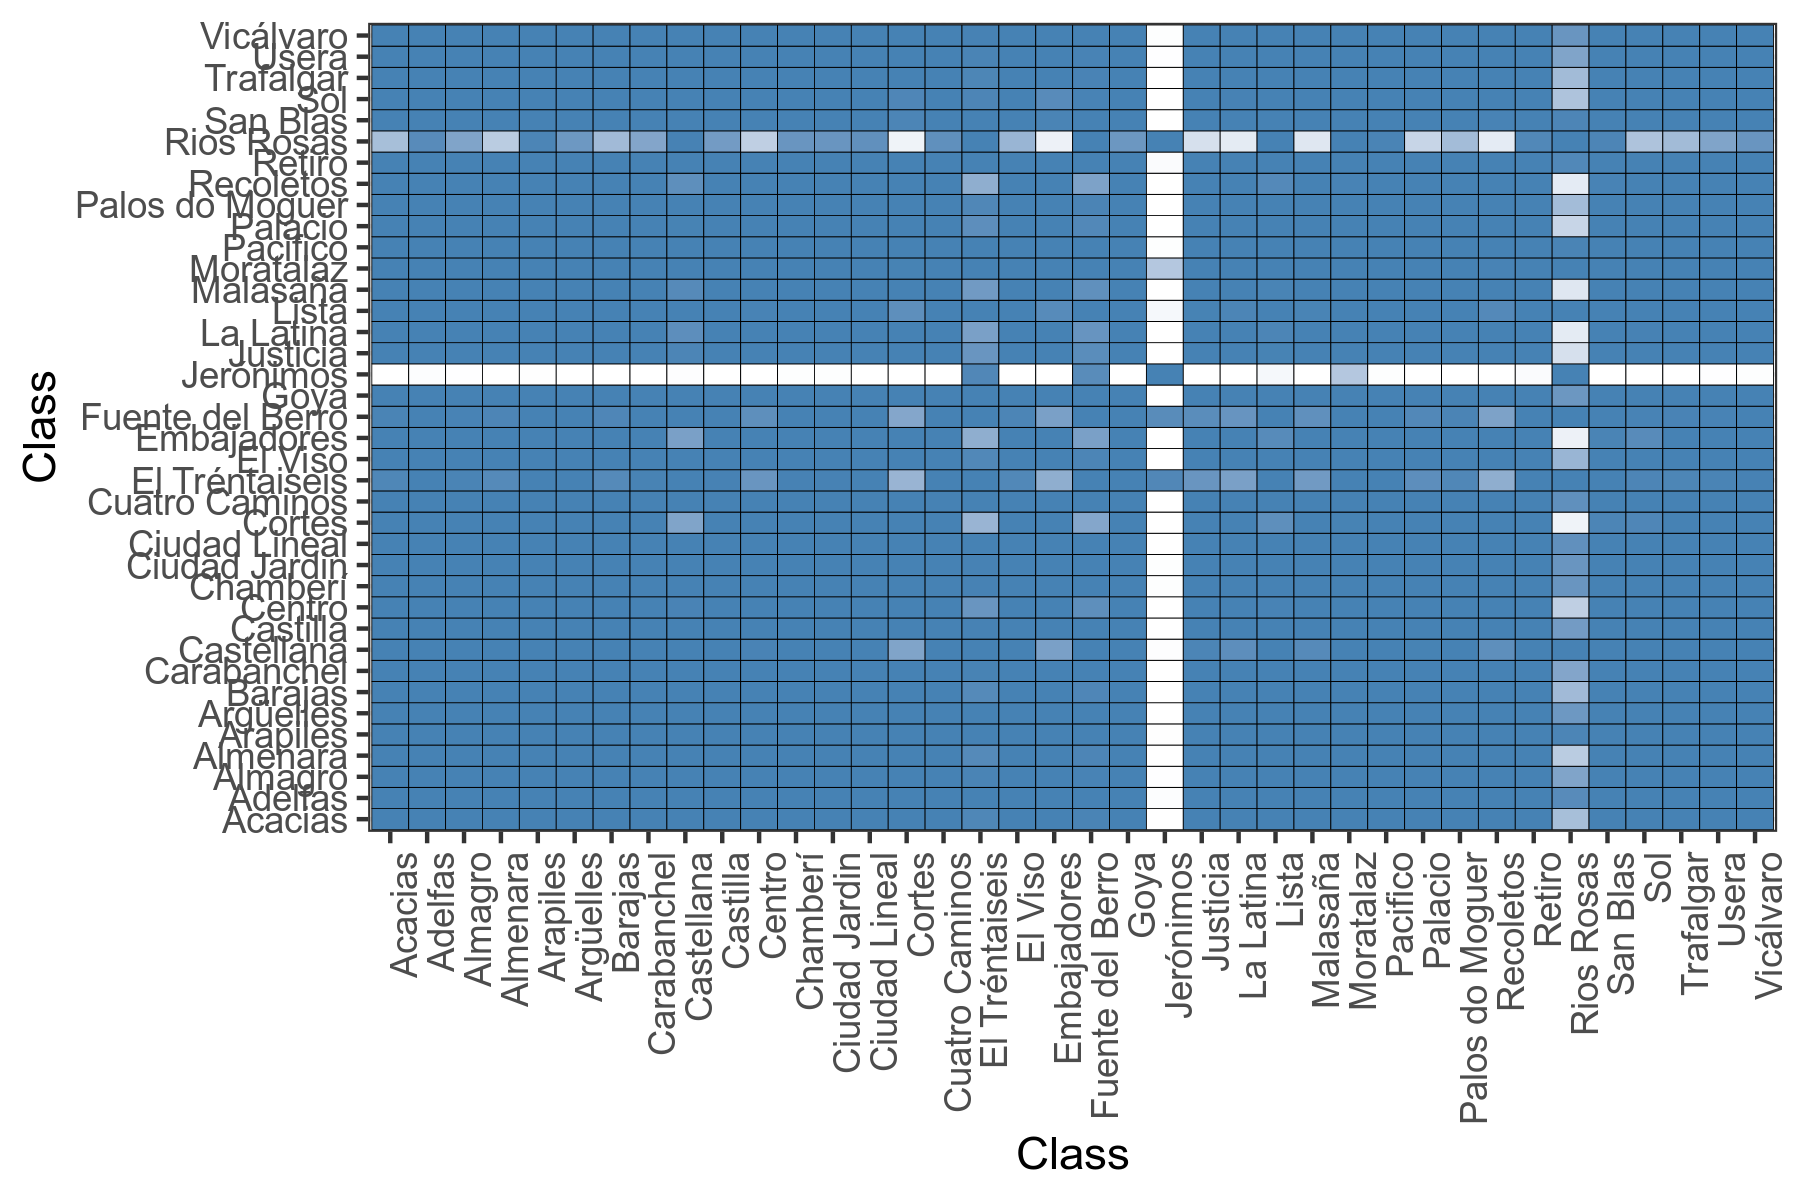

In [18]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=clean_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(clean_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [19]:
install.packages('dendextend')


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done



---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: ‘dendextend’

The following object is masked from ‘package:stats’:

    cutree



'dendrogram' with 2 branches and 38 members total, at height 1 

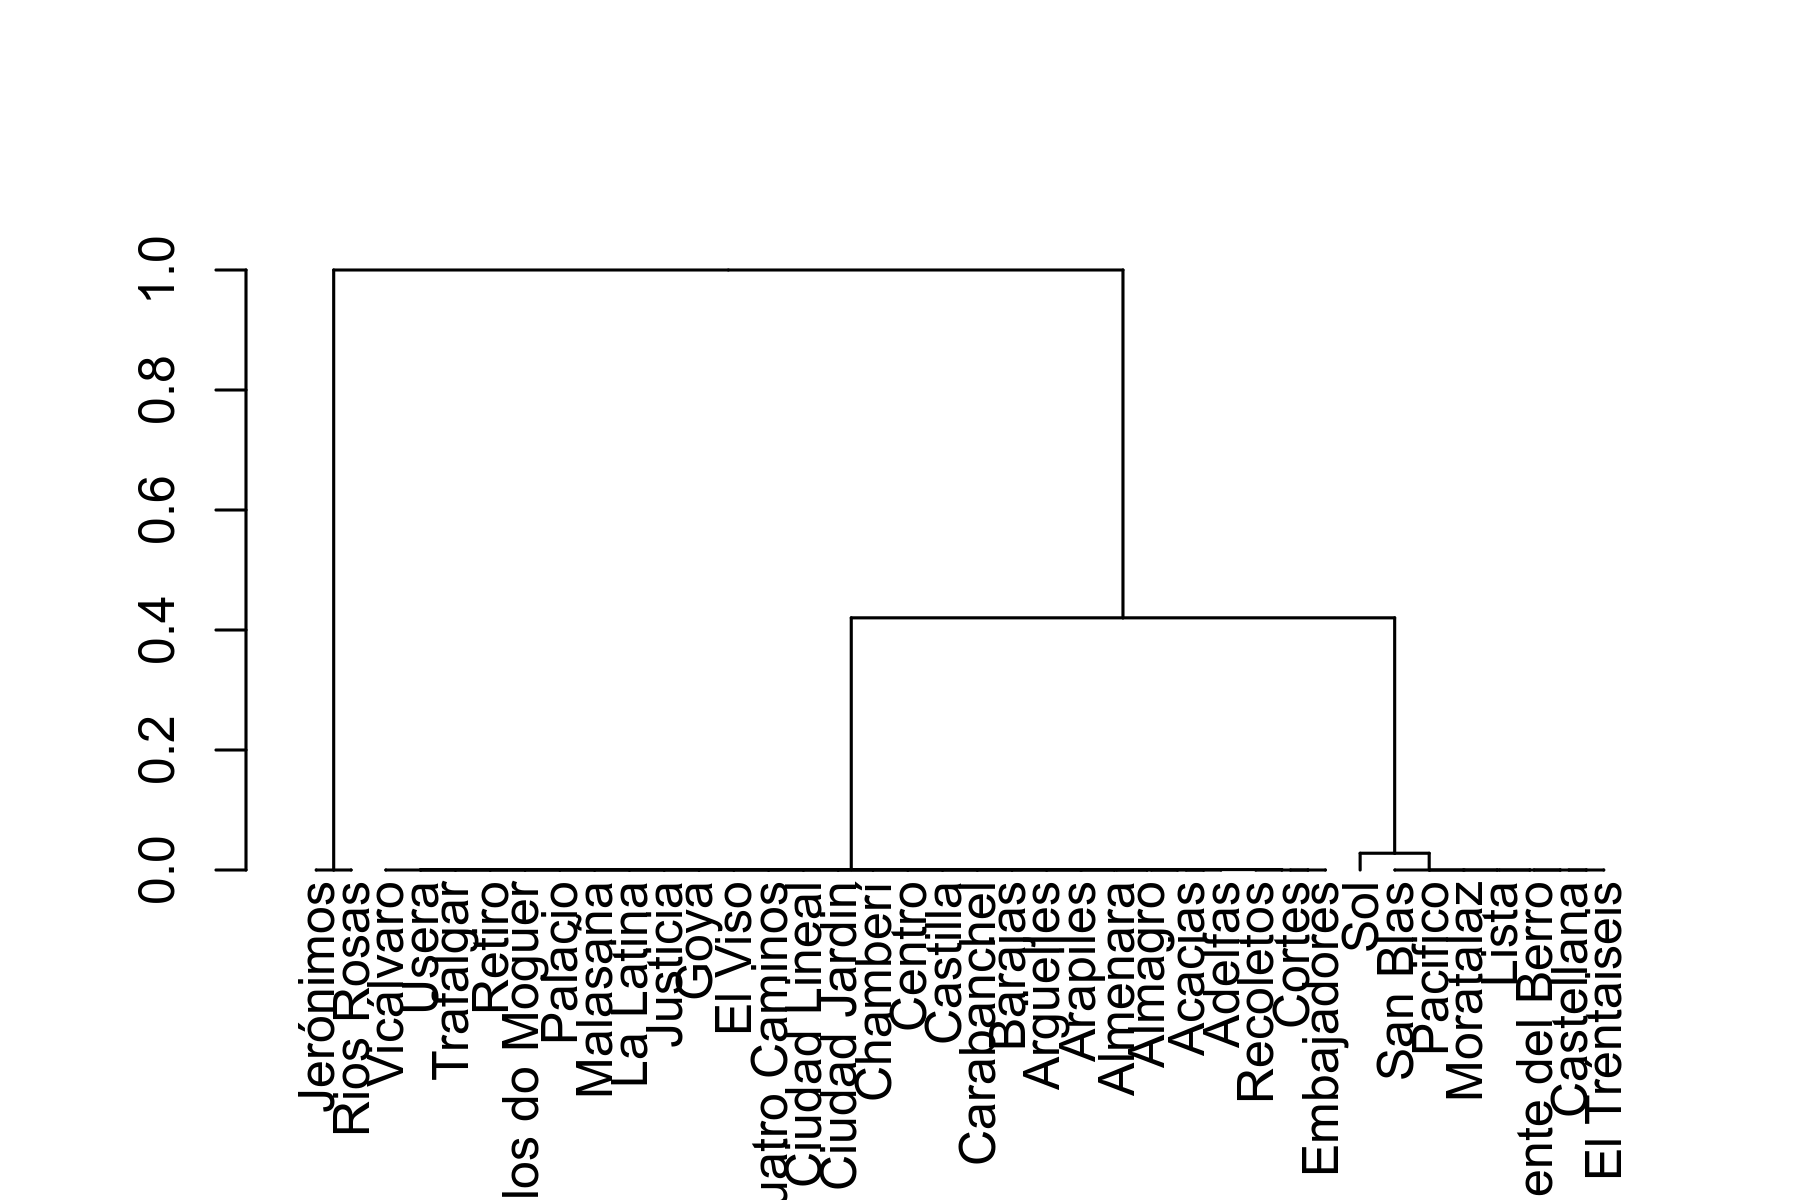

In [20]:
#Uso los datos del tukey para realizarlo y del dataframe último clean_dataset
library(cluster)
library(dendextend)
#Uso 1 el absoluto de resm como distancia
mad_tree <- as.dist(1 - abs(resm))
#Genero el conjunto de clústers
mad_cluster <- hclust(mad_tree,method="complete")
#Convierto al dendograma
dendograma <- as.dendrogram(mad_cluster)
dendograma
plot(dendograma )


¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

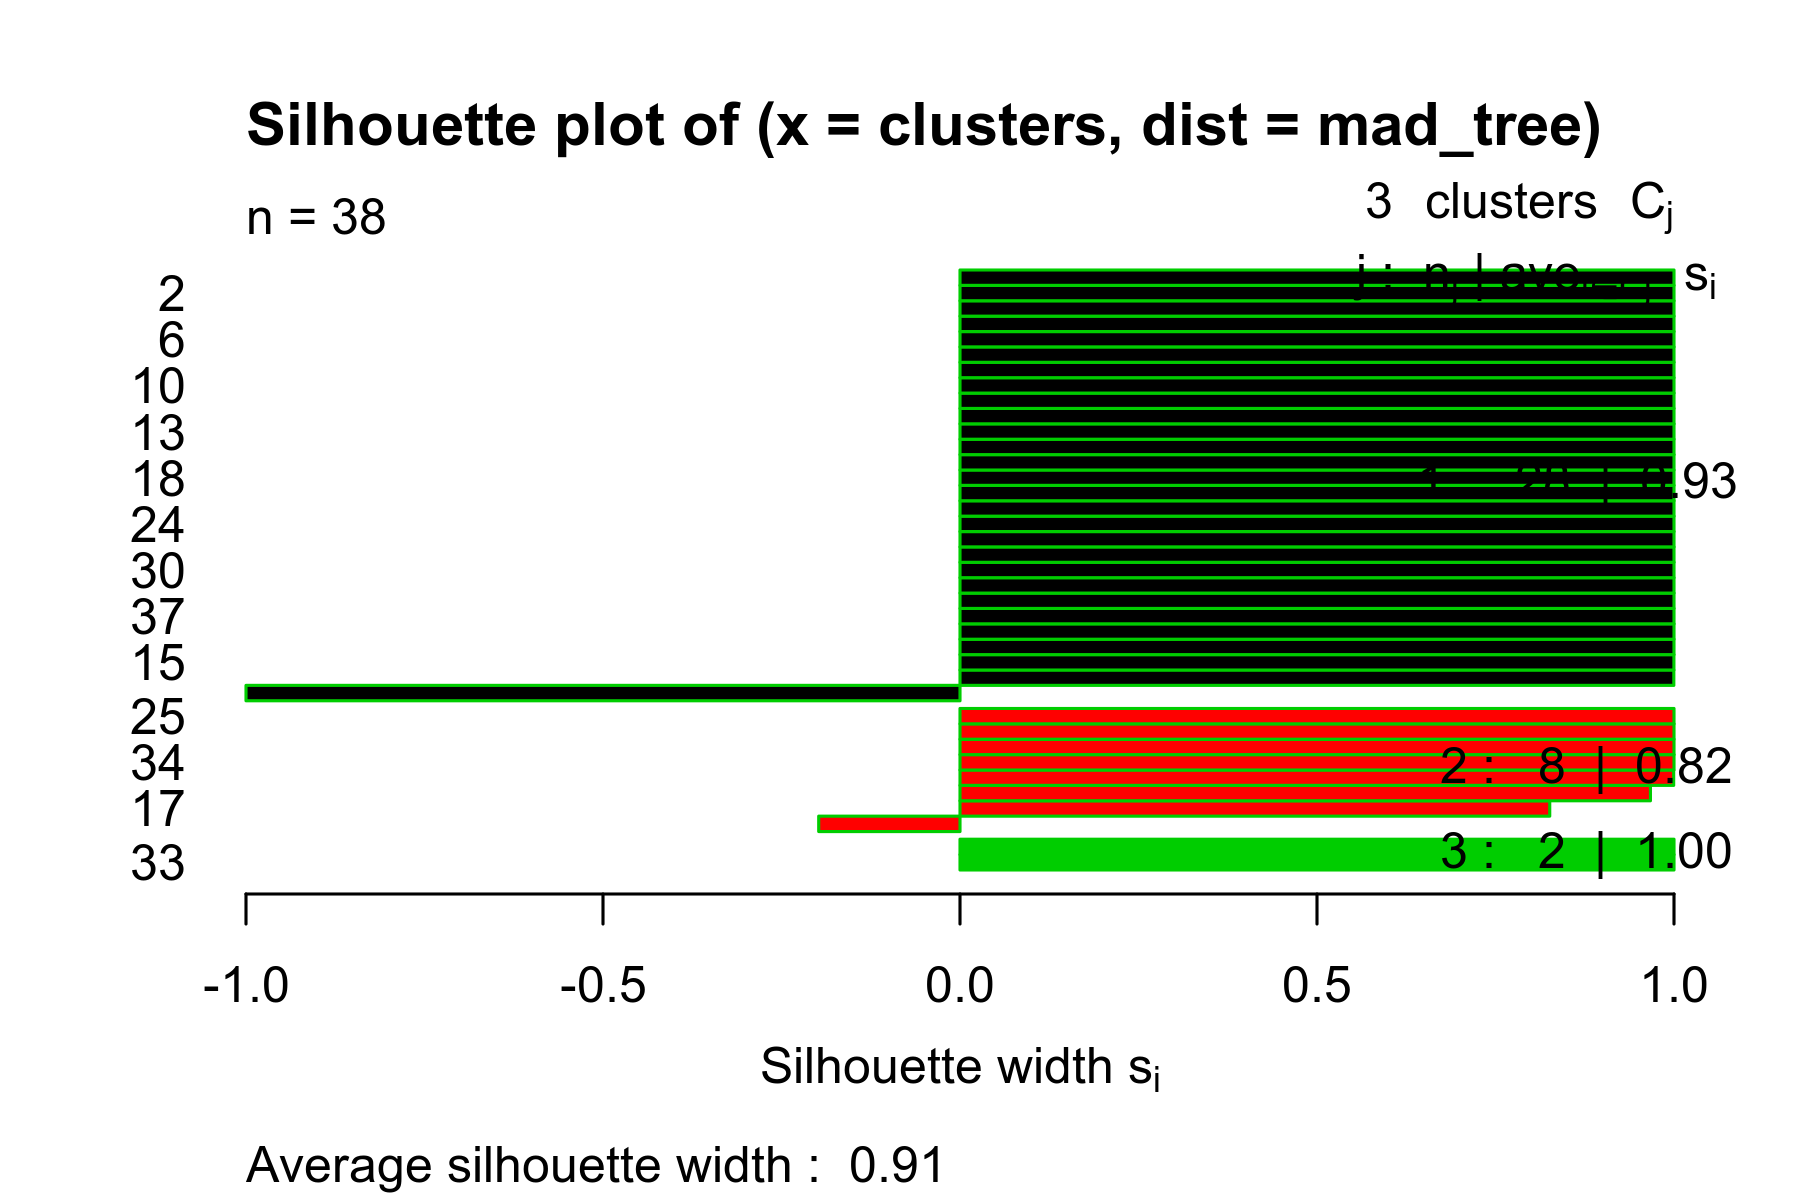

In [21]:
#Usamos silhouette para ver los datos de los clústeres  
#En el dendograma observo que existen las posibilidades de 2 , 3 o 5 clústeres
#Probando con varios valores el indicado resulta ser este
clusters <- cutree(dendograma , k= 3)
ss <- silhouette(clusters , mad_tree)
plot(ss , col=1:max(clusters), border=27)

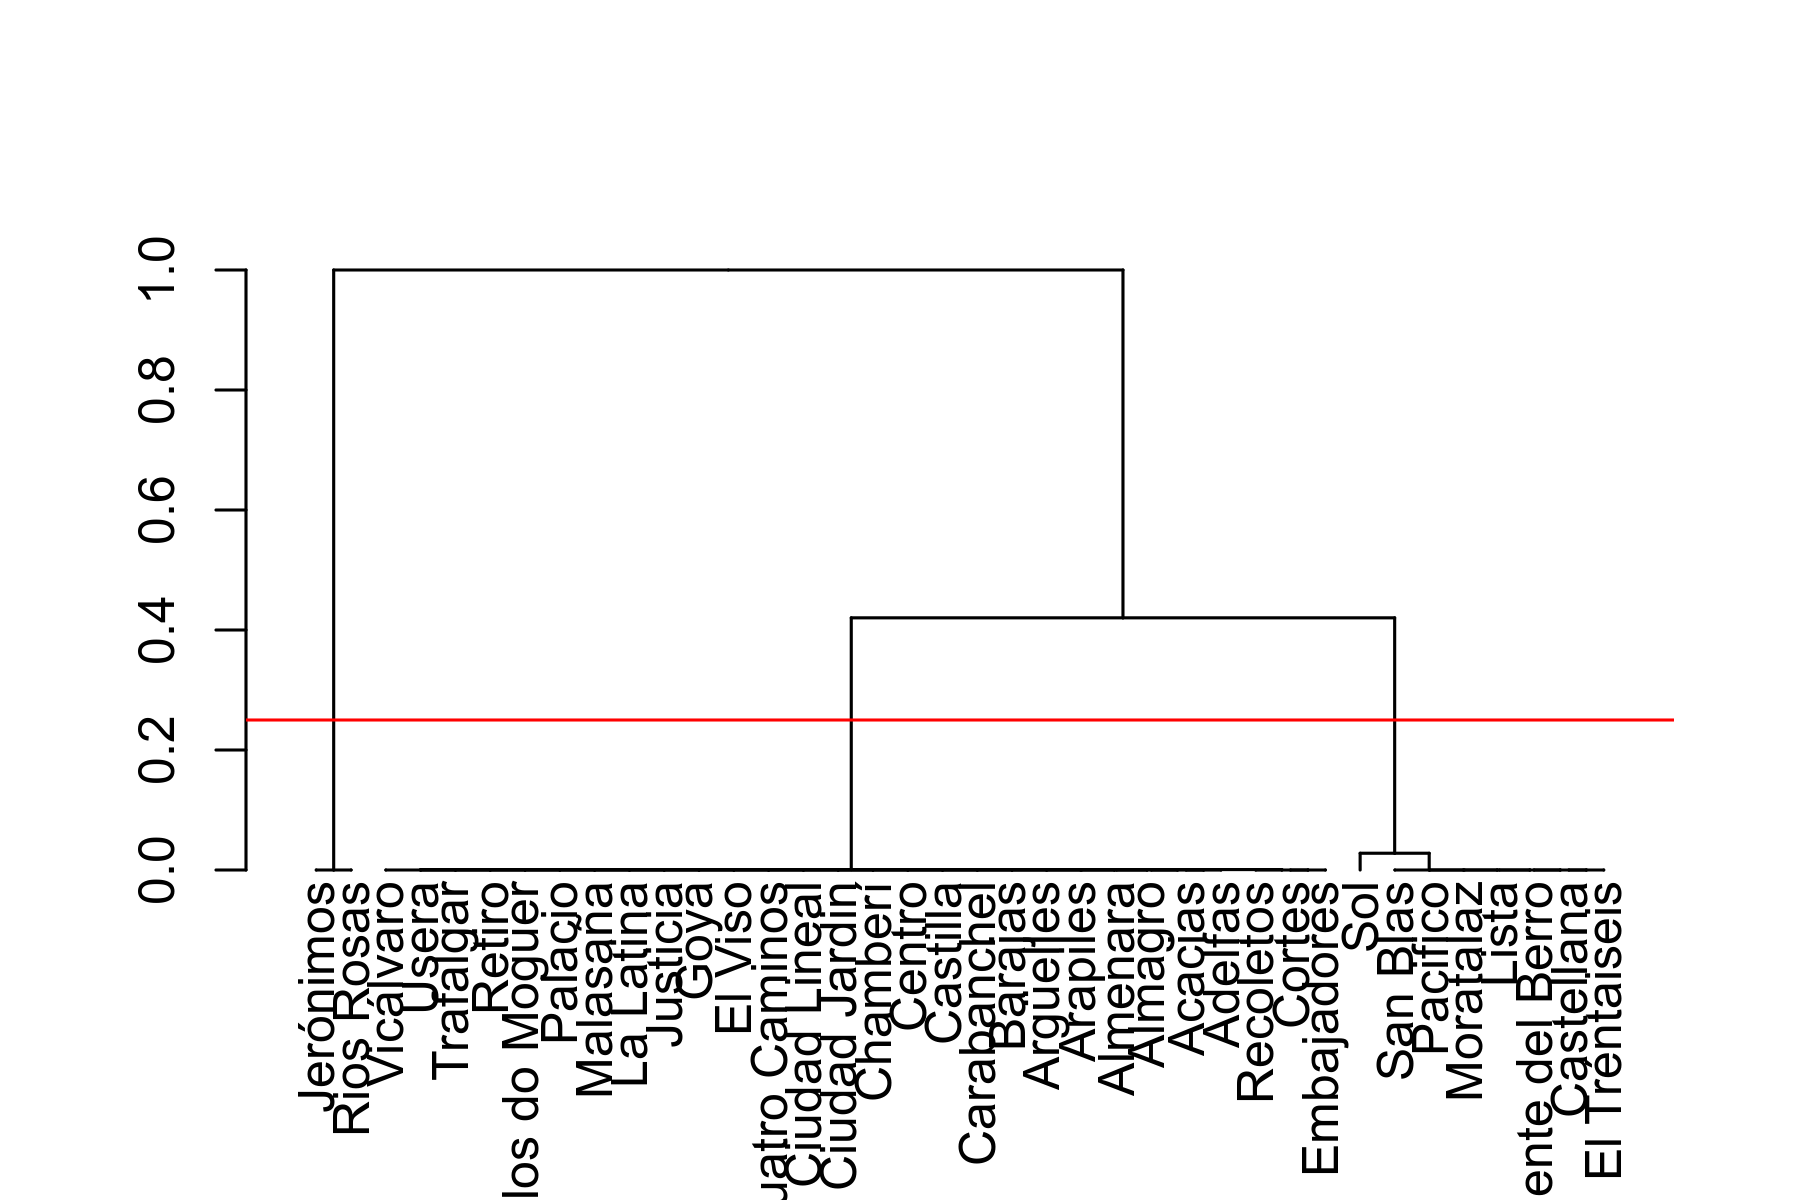

In [22]:
plot(dendograma , cex=0.1 )
abline(h=0.25, col="red")
#El punto aconsejable parece ser aproximadamente a 0.25 de modo que aparecen 3 clústeres diferenciados

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [23]:
clean_madrid$neighb_id <- as.factor(clusters)

ERROR: Error in `$<-.data.frame`(`*tmp*`, neighb_id, value = structure(c(Acacias = 1L, : replacement has 38 rows, data has 174


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [ ]:
data_train<-c()
data_test<-c()
for (i in 1:140){
  model<-glm(formula=Square.Meters~poly(Accomodates, Bedrooms , Bathrooms),data=clean_madrid)
  yp_train<-predict(model,clean_madrid)
  data_train[i]<-calcmse(clean_madrid$Square.Meters,yp_train)
  
  yp_test<-predict(model,data_test)
  mse_test[i] <-calcmse(data_test$y,yp_test)
}
mse.df<-data.frame(degree=1:length(data_train),mse=data_train,type="Train")
mse.df<-rbind(mse.df,data.frame(degree=1:length(data_train),mse=data_test,type="Test"))
ggplot(mse.df,aes(x=Square.Meters,y=mse,color=type))+geom_line()+geom_point()


In [ ]:
model <- lm(Square.Meters~Accomodates+Bathrooms+Beds+Price,data=clean_madrid)
summary(model)

In [ ]:
cv<-glmnetUtils::cv.glmnet(formula=Square.Meters~Accomodates+Bathrooms+Bedrooms+Beds+Price
                          data = df_madrid_train,
                          alpha=1 , 
                          nfold=10,
                          type.measures="mse",
                          standardize = T)

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [ ]:
#Reutilizo df_madrid con los valores del predict

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [ ]:
pr <- prcomp(clean_madrid$Square.Meters , center = TRUE , scale = TRUE)
pr

In [ ]:
Apc <- pr$x[,1:Numero_pcas]

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?